In [1]:
import re
import json
import datetime
from collections import Counter

import pandas as pd
from pandas.io.json import json_normalize

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open("data/messages.json", "r") as fp:
    msgdict = json.loads(fp.read())
    msgdict = json.loads(msgdict)
    messages = pd.DataFrame(msgdict).sort_values(by = "id")

FileNotFoundError: [Errno 2] No such file or directory: 'data/messages.json'

In [3]:
messages.tail()

,body,date,hour,id,timestamp,week,weekday
12437,"{""users"": [132820308]}",2018-08-26,10,12804,1535270511,34,6
12438,S2 Richtung Buch,2018-08-26,11,12805,1535275453,34,6
12439,,2018-08-26,11,12806,1535275544,34,6
12440,die beiden,2018-08-26,11,12807,1535275579,34,6
12441,S42 Landsberger Allee Insgesamt 3-4 männlich g...,2018-08-26,12,12808,1535279636,34,6


# Overall Counts

In [4]:
regexp = re.compile("(?<!\w)([MUS]\W?\d+)(?:\W|$)", re.I)
print(regexp.findall(" S3/S5/s7/s9"))

['S3', 'S5', 's7', 's9']


In [5]:
totalmatches = Counter()

bins = {
    'S41': 'Ring',
    'S42': 'Ring',
    'S1': 'S12',
    'S12': 'S12',
    'S19': 'S12',
    'S2': 'S12',
    'S21': 'S12',
    'S25': 'S12',
    'S26': 'S12',
    'S3': 'S3579',
    'S45': 'Ring',
    'S46': 'Ring',
    'S47': 'Ring',
    'S48': 'Ring',
    'S5': 'S3579',
    'S7': 'S3579',
    'S75': 'S3579',
    'S8': 'Ring',
    'S85': 'Ring',
    'S9': 'S3579',
}


for row in messages.iterrows():
    rowbody = row[1]["body"]
    rowmatches = regexp.findall(rowbody)

    #print(rowbody)
    #print(rowmatches)
    for match in rowmatches:
        m = re.sub(r'[\W]', "", match).upper()
        totalmatches[bins.get(m, m)] += 1
        break

In [6]:
total_control_count = sum([val for key, val in totalmatches.items()])

In [7]:
total_control_count

3279

In [8]:
len(totalmatches)

39

In [9]:
totalmatches

Counter({'M1': 51,
         'M10': 286,
         'M11': 1,
         'M12': 4,
         'M13': 45,
         'M16': 1,
         'M17': 8,
         'M19': 6,
         'M2': 13,
         'M21': 3,
         'M25': 1,
         'M27': 2,
         'M29': 25,
         'M4': 22,
         'M41': 15,
         'M44': 6,
         'M45': 5,
         'M46': 7,
         'M48': 4,
         'M49': 2,
         'M5': 4,
         'M6': 8,
         'M76': 1,
         'M77': 1,
         'M8': 13,
         'M85': 5,
         'Ring': 765,
         'S09': 2,
         'S12': 254,
         'S3579': 443,
         'U1': 239,
         'U2': 162,
         'U3': 70,
         'U4': 4,
         'U5': 39,
         'U6': 134,
         'U7': 237,
         'U8': 295,
         'U9': 96})

In [10]:
sorted_totalmatches = sorted(list(totalmatches.items()), key=lambda tup: -tup[1])

In [11]:
overall_top_10 = sorted_totalmatches[:10]

In [12]:
overall_top_10

[('Ring', 765),
 ('S3579', 443),
 ('U8', 295),
 ('M10', 286),
 ('S12', 254),
 ('U1', 239),
 ('U7', 237),
 ('U2', 162),
 ('U6', 134),
 ('U9', 96)]

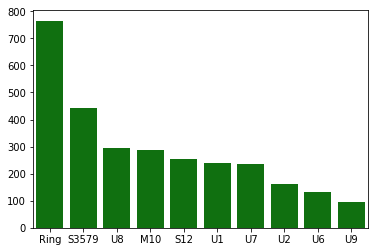

In [13]:
lines = [el[0] for el in overall_top_10]
count = [el[1] for el in overall_top_10]
sns.barplot(x=lines, y=count, color="green")

In [14]:
sbahncounts = list(filter(lambda tup: tup[0][0] == "S" or tup[0] == "Ring", sorted_totalmatches))[:10]

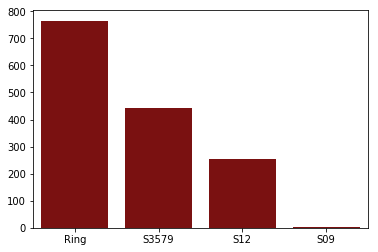

In [15]:
lines = [el[0] for el in sbahncounts]
count = [el[1] for el in sbahncounts]
sns.barplot(x=lines, y=count, color="darkred")

In [16]:
sum(count)

1464

In [17]:
tramcounts = list(filter(lambda tup: tup[0][0] == "M", sorted_totalmatches))[:10]

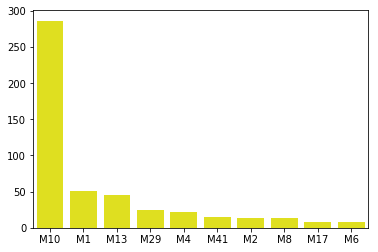

In [18]:
lines = [el[0] for el in tramcounts]
count = [el[1] for el in tramcounts]
sns.barplot(x=lines, y=count, color="yellow")

In [19]:
ubahncounts = list(filter(lambda tup: tup[0][0] == "U", sorted_totalmatches))[:10]

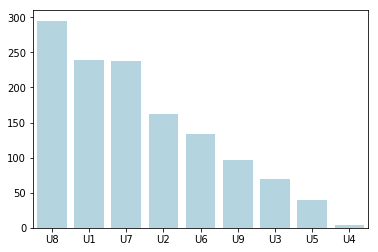

In [20]:
lines = [el[0] for el in ubahncounts]
count = [el[1] for el in ubahncounts]
sns.barplot(x=lines, y=count, color="lightblue")

In [21]:
sum(count)

1276

In [91]:
#TODO
#match stations
#version control